

---
# MNIST Dataset Classification Task
## Charis Filis Academic-Id: 9449


### Import dependecies 

In [88]:
pip install -q -U keras-tuner


Note: you may need to restart the kernel to use updated packages.


In [103]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from keras.utils import np_utils
import keras_tuner as kt
import sympy
import numpy as np
import seaborn as sns
import collections
import time
# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt

### Data Preprocessing

In [104]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0
n_classes = 10;
n_features = 784; # features are the pixels of each image
print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))
print("Training data shape:",x_train.shape)
print("Training y train shape", y_train.shape)
print("Testing data shape:",x_test.shape)
x_train, x_test = x_train.reshape([-1, n_features]), x_test.reshape([-1, n_features])

#Normalize to [0,1]
x_train, x_test = x_train/255, x_test/255
#One-hot encoding (to increase performance) - Encode Categorigal Data to one and zero
y_test_not_processed = y_test
y_train, y_test = tf.one_hot(y_train, n_classes), tf.one_hot(y_test, n_classes)
# Flatten Dataset to vector in order to have proper input
# Training parameters.
learning_rate = 0.1
training_steps = 2000
batch_size = 256
display_step = 100
# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

Number of original training examples: 60000
Number of original test examples: 10000
Training data shape: (60000, 28, 28, 1)
Training y train shape (60000,)
Testing data shape: (10000, 28, 28, 1)


In [105]:
def model_builder():
    # Set Layers
    model_default = keras.Sequential()
    # # Input Layer
    model_default.add(layers.Flatten(input_shape=(n_features,)))
    # 1st hidden Layer
    model_default.add(layers.Dense(n_hidden_1,input_shape=(n_features,), activation='relu'))
    # 2nd hidden Layer
    model_default.add(layers.Dense(n_hidden_2,activation='relu'))
    # Output Layer
    model_default.add(layers.Dense((10),activation='softmax'))
    model_default.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
    return model_default

## Case 1 online Training --- Batch_size = 1

In [7]:
model_default=model_builder()
model_default.summary()
start = time.time()
history = model_default.fit(x_train,y_train, epochs=100, batch_size=1, validation_split=0.2, verbose=1)
end = time.time()
print("Training time: {}s".format(end-start))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


48000/48000 [==============================] - 131s 3ms/step - loss: 0.6327 - accuracy: 0.8216 - val_loss: 0.4604 - val_accuracy: 0.9039
Epoch 2/100
48000/48000 [==============================] - 132s 3ms/step - loss: 0.4856 - accuracy: 0.9040 - val_loss: 0.4532 - val_accuracy: 0.9176
Epoch 3/100
48000/48000 [==============================] - 151s 3ms/step - loss: 0.4939 - accuracy: 0.9156 - val_loss: 0.4381 - val_accuracy: 0.9273
Epoch 4/100
48000/48000 [==============================] - 131s 3ms/step - loss: 0.5024 - accuracy: 0.9223 - val_loss: 0.4629 - val_accuracy: 0.9303
Epoch 5/100
48000/48000 [==============================] - 124s 3ms/step - loss: 0.5016 - accuracy: 0.9280 - val_loss: 0.4201 - val_accuracy: 0.9363
Epoch 6/100
48000/48000 [==============================] - 131s 3ms/step - loss: 0.4909 - accuracy: 0.9344 - val_loss: 0.5852 - val_accuracy: 0.9192
Epoch 7/100
48000/48000 [==============================] - 120s 3ms/step - loss: 0.4807 - accuracy: 0.9375 - val_loss:

###### Plot Results

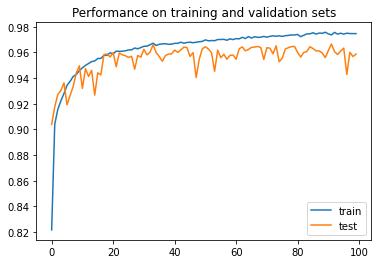

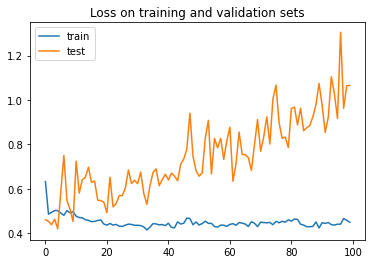

In [8]:
plt.figure(1)
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Performance on training and validation sets')
plt.show()
plt.figure(2)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

#### Case 2 - Minibatch Training with backpropagating grads


In [95]:
model_default=model_builder()
model_default.summary()
start = time.time()
history = model_default.fit(x_train,y_train, epochs=100, batch_size=256, validation_split=0.2, verbose=1)
end = time.time()
print("Training time: {}s".format(end-start))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 256)               33024     
                                                                 
 dense_17 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
188/188 [==============================] - 2s 6ms/step - loss: 1.6419 - accuracy: 0.5045 - val_loss: 1.0041 - val_accuracy: 0.6851
Epoch 2/100
188/188 [================

Plot Results

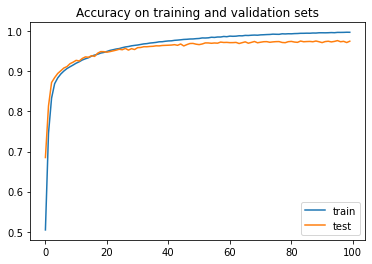

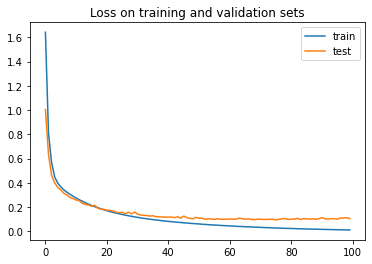

In [96]:
plt.figure(3)
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()
plt.figure(4)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

### Case 3 Batch Learning Batch_Size = Training Size

In [97]:
model_batch_training=model_builder()
model_batch_training.summary()
tic = time.time()
Ntrain = (int)(0.8*x_train.shape[1])
history = model_batch_training.fit(x_train,y_train, epochs=100, batch_size=Ntrain, validation_split=0.2, verbose=1)
toc = time.time()
print("Training time: {}s".format(toc-tic))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 256)               33024     
                                                                 
 dense_20 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
77/77 [==============================] - 1s 10ms/step - loss: 2.0612 - accuracy: 0.3800 - val_loss: 1.6370 - val_accuracy: 0.5272
Epoch 2/100
77/77 [===================

Plot Results

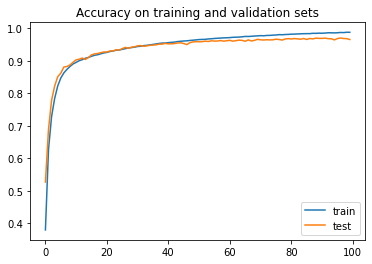

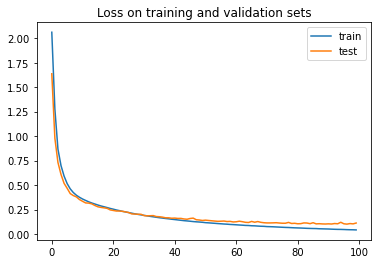

In [98]:
plt.figure(5)
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()
plt.figure(6)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

### Case 4 RMSProp optimizer with ρ = 0.01

Epoch 1/100
188/188 [==============================] - 2s 5ms/step - loss: 0.0126 - accuracy: 0.9971 - val_loss: 0.2353 - val_accuracy: 0.9708
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 0.2306 - val_accuracy: 0.9718
Epoch 3/100
188/188 [==============================] - 1s 3ms/step - loss: 0.0121 - accuracy: 0.9973 - val_loss: 0.2264 - val_accuracy: 0.9718
Epoch 4/100
188/188 [==============================] - 1s 3ms/step - loss: 0.0107 - accuracy: 0.9975 - val_loss: 0.2476 - val_accuracy: 0.9713
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0117 - accuracy: 0.9971 - val_loss: 0.2534 - val_accuracy: 0.9721
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0120 - accuracy: 0.9971 - val_loss: 0.2439 - val_accuracy: 0.9727
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0119 - accuracy: 0.9972 - val_loss: 0.2397 - val_accuracy: 0.9725

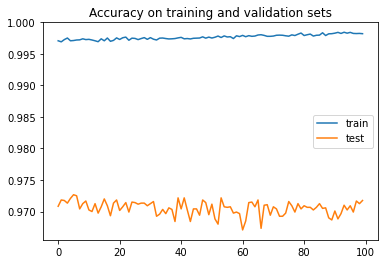

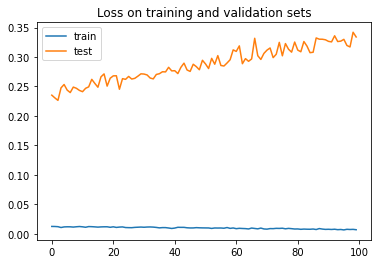

In [101]:
model_default.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.01),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
tic = time.time()

history = model_default.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.2, verbose=1)
toc = time.time()
print("Training tim: {}s".format(toc-tic))
plt.figure(7)
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()
plt.figure(8)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

### Case 5 RMSPro with rho = 0.99

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 256)               33024     
                                                                 
 dense_23 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
188/188 [==============================] - 1s 5ms/step - loss: 1.3716 - accuracy: 0.5575 - val_loss: 0.8532 - val_accuracy: 0.7409
Epoch 2/100
188/188 [================

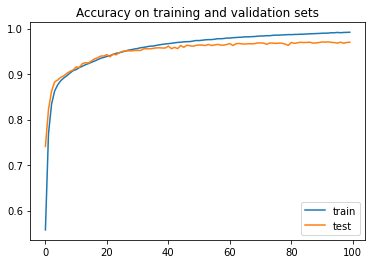

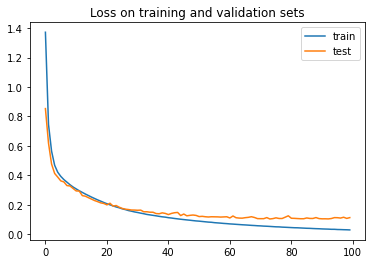

In [100]:
model_5=model_builder()
model_5.summary()
model_5.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.99),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
tic = time.time()

history = model_5.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.2, verbose=1)
toc = time.time()
print("Training tim: {}s".format(toc-tic))
plt.figure(9)
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()
plt.figure(10)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

### Custom Neural Net Implementation For Learnng Purposes

In [10]:
# Create TF Model.
class NeuralNet4(Model):
# Set layers.
    def __init__(self):
        super(NeuralNet4, self).__init__()
        # First fully-connected hidden layer.
        self.fc1 = layers.Dense(n_hidden_1, activation=tf.nn.relu)
        # First fully-connected hidden layer.
        self.fc2 = layers.Dense(n_hidden_2, activation=tf.nn.relu)
        # Second fully-connecter hidden layer.
        self.out = layers.Dense(num_classes)
        # Set forward pass.
    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        if not is_training:
        # tf cross entropy expect logits without softmax, so only
        # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x
        # Build neural network model.
        neural_net = NeuralNet()

In [11]:
#Cross-Entropy Loss.
# Note that this will apply 'softmax' to the logits.
def cross_entropy_loss(x, y):
    # Convert labels to int 64 for tf cross-entropy function.
    y = tf.cast(y, tf.int64)
    # Apply softmax to logits and compute cross-entropy.
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
    logits=x)
    # Average loss across the batch.
    return tf.reduce_mean(loss)
    # Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32),
    axis=-1)
    # Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [12]:
# Optimization process.
def run_optimization(x, y):
# Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
# Forward pass.
        pred = neural_net(x, is_training=True)
# Compute loss.
        loss = cross_entropy_loss(pred, y)
# Variables to update, i.e. trainable variables.
    trainable_variables = neural_net.trainable_variables
# Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
# Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

### Case 6 SGD optimizer and initializer of initial weights with normal distribution of mean 10 

#### Model 2 : Weight initialization from normal distribution with non-zero mean and SDG optimzer on training with 0 momentum and 0.01 learning rate 

Epoch 1/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.0901 - val_loss: 2.3026 - val_accuracy: 0.0914
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.0901 - val_loss: 2.3026 - val_accuracy: 0.0914
Epoch 3/100
188/188 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.0901 - val_loss: 2.3026 - val_accuracy: 0.0914
Epoch 4/100
188/188 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.0901 - val_loss: 2.3026 - val_accuracy: 0.0914
Epoch 5/100
188/188 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.0901 - val_loss: 2.3026 - val_accuracy: 0.0914
Epoch 6/100
188/188 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.0901 - val_loss: 2.3026 - val_accuracy: 0.0914
Epoch 7/100
188/188 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.0901 - val_loss: 2.3026 - val_accuracy: 0.0914

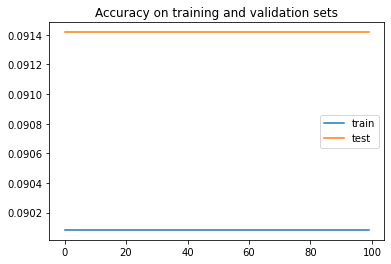

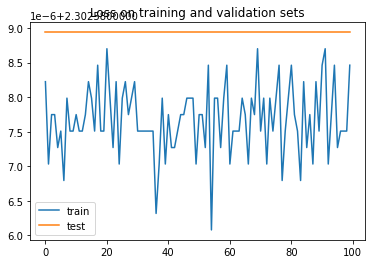

In [22]:
# model 4 
model_2 = keras.Sequential()
# 1st hidden layer
model_2.add(layers.Dense(n_hidden_1,input_shape=(n_features,),activation='relu',
                         kernel_initializer = initializers.RandomNormal(mean=10)))
# 2nd hidden layer
model_2.add(layers.Dense(n_hidden_2,activation='relu',
                         kernel_initializer=initializers.RandomNormal(mean=10)))
# Output layer
model_2.add(layers.Dense(10,kernel_initializer=initializers.RandomNormal(mean=10)))

# Compile model with correct optimizer
model_2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.0),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
tic = time.time()

history = model_2.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.2, verbose=1)
toc = time.time()
print("Training tim: {}s".format(toc-tic))
plt.figure(11)
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()
plt.figure(12)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()


### Case 7 - Model3  all choised from before + L2 weights reguralization
##### + initialization from normal distribution with non-zero mean 

In [23]:
a = 0.1

Model3 = keras.Sequential()
# kernel _ reguralizer which applies penalty to the layer in this case keras layer means weights
Model3.add(layers.Dense(n_hidden_1,input_shape=(n_features,),activation='relu',
                         kernel_initializer = initializers.RandomNormal(mean=10), 
                         kernel_regularizer = regularizers.L2(a)))
#2nd -hidden
Model3.add(layers.Dense(n_hidden_2,activation='relu', kernel_initializer = initializers.RandomNormal(mean=10),
                        kernel_regularizer = regularizers.L2(a)))
# output layer
Model3.add(layers.Dense(10,activation='softmax', kernel_initializer = initializers.RandomNormal(mean=10),
                        kernel_regularizer = regularizers.L2(a)))
Model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 128)               100480    
                                                                 
 dense_23 (Dense)            (None, 256)               33024     
                                                                 
 dense_24 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


### Case 7:a = 0.1

Epoch 1/100
188/188 [==============================] - 1s 4ms/step - loss: 1044349.1875 - accuracy: 0.1137 - val_loss: 661319.4375 - val_accuracy: 0.1060
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: 466024.1875 - accuracy: 0.1140 - val_loss: 311527.2500 - val_accuracy: 0.1060
Epoch 3/100
188/188 [==============================] - 1s 3ms/step - loss: 219530.0469 - accuracy: 0.1140 - val_loss: 146751.8594 - val_accuracy: 0.1060
Epoch 4/100
188/188 [==============================] - 1s 3ms/step - loss: 103414.8516 - accuracy: 0.1140 - val_loss: 69131.2500 - val_accuracy: 0.1060
Epoch 5/100
188/188 [==============================] - 1s 3ms/step - loss: 48716.6328 - accuracy: 0.1140 - val_loss: 32566.7461 - val_accuracy: 0.1060
Epoch 6/100
188/188 [==============================] - 1s 3ms/step - loss: 22950.0605 - accuracy: 0.1140 - val_loss: 15342.3711 - val_accuracy: 0.1060
Epoch 7/100
188/188 [==============================] - 1s 3ms/step - loss: 10812.2529 

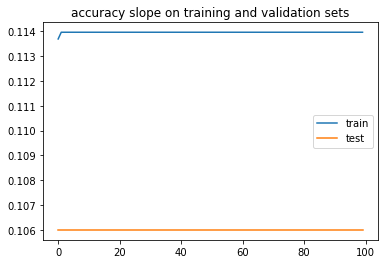

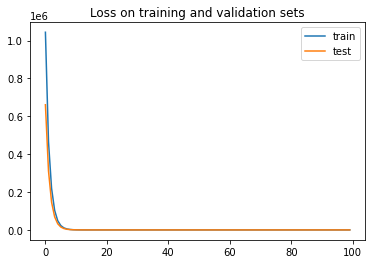

In [25]:
## Hint i use value from_logiths = False because my output layer has softmax activation function already 
Model3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
               loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
tic = time.time()
history3 = Model3.fit(x_train,y_train,epochs=100,batch_size=256,validation_split=0.2,verbose=1)
toc = time.time()
print("Training time: {}s".format(toc-tic))

# Plot results
plt.figure(13)
plt.plot(history3.history['accuracy'],label='train')
plt.plot(history3.history['val_accuracy'],label='test')
plt.legend()
plt.title('accuracy slope on training and validation sets')
plt.show


plt.figure(14)
plt.plot(history3.history['loss'],label='train')
plt.plot(history3.history['val_loss'],label='test')
plt.legend()
plt.title("Loss on training and validation sets")
plt.show()


#### Case 8 a = 0.01


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               100480    
                                                                 
 dense_29 (Dense)            (None, 256)               33024     
                                                                 
 dense_30 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
188/188 [==============================] - 1s 4ms/step - loss: 194093.1562 - accuracy: 0.1134 - val_loss: 130869.1328 - val_accuracy: 0.1060
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: 126106.8047 - accuracy: 0.1140 - val_loss: 121387.9922 - val_accuracy: 0.1060
Epoch

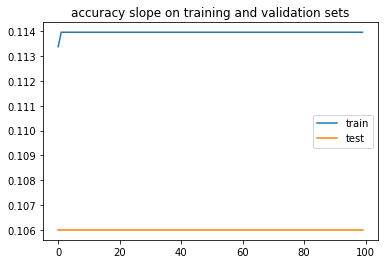

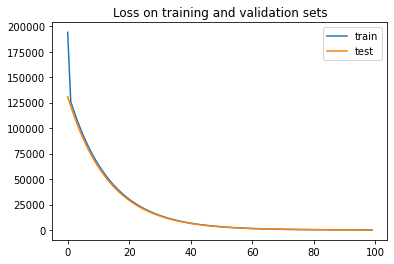

In [27]:
a = 0.01
Model3 = keras.Sequential()
# kernel _ reguralizer which applies penalty to the layer in this case keras layer means weights
Model3.add(layers.Dense(n_hidden_1,input_shape=(n_features,),activation='relu',
                         kernel_initializer = initializers.RandomNormal(mean=10), 
                         kernel_regularizer = regularizers.L2(a)))
#2nd -hidden
Model3.add(layers.Dense(n_hidden_2,activation='relu', kernel_initializer = initializers.RandomNormal(mean=10),
                        kernel_regularizer = regularizers.L2(a)))
# output layer
Model3.add(layers.Dense(10,activation='softmax', kernel_initializer = initializers.RandomNormal(mean=10),
                        kernel_regularizer = regularizers.L2(a)))
Model3.summary()
## Hint i use value from_logiths = False because my output layer has softmax activation function already 
Model3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
               loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
tic = time.time()
history3 = Model3.fit(x_train,y_train,epochs=100,batch_size=256,validation_split=0.2,verbose=1)
toc = time.time()
print("Training time: {}s".format(toc-tic))

# Plot results
plt.figure(15)
plt.plot(history3.history['accuracy'],label='train')
plt.plot(history3.history['val_accuracy'],label='test')
plt.legend()
plt.title('accuracy slope on training and validation sets')
plt.show


plt.figure(16)
plt.plot(history3.history['loss'],label='train')
plt.plot(history3.history['val_loss'],label='test')
plt.legend()
plt.title("Loss on training and validation sets")
plt.show()


### Case 9 a = 0.001 

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 128)               100480    
                                                                 
 dense_35 (Dense)            (None, 256)               33024     
                                                                 
 dense_36 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
188/188 [==============================] - 1s 4ms/step - loss: 61453.2852 - accuracy: 0.1136 - val_loss: 13984.8203 - val_accuracy: 0.1060
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: 13932.8018 - accuracy: 0.1140 - val_loss: 13880.0684 - val_accuracy: 0.1060
Epoch 3/1

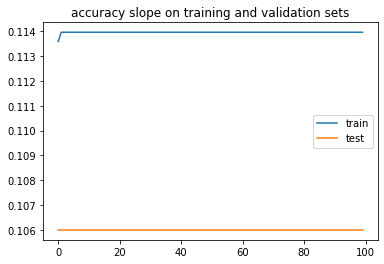

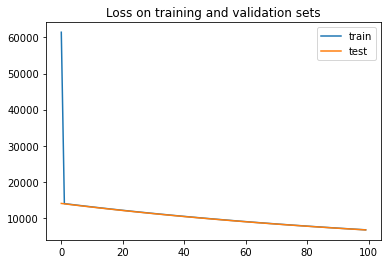

In [29]:
a = 0.001
Model3 = keras.Sequential()
# kernel _ reguralizer which applies penalty to the layer in this case keras layer means weights
Model3.add(layers.Dense(n_hidden_1,input_shape=(n_features,),activation='relu',
                         kernel_initializer = initializers.RandomNormal(mean=10), 
                         kernel_regularizer = regularizers.L2(a)))
#2nd -hidden
Model3.add(layers.Dense(n_hidden_2,activation='relu', kernel_initializer = initializers.RandomNormal(mean=10),
                        kernel_regularizer = regularizers.L2(a)))
# output layer
Model3.add(layers.Dense(10,activation='softmax', kernel_initializer = initializers.RandomNormal(mean=10),
                        kernel_regularizer = regularizers.L2(a)))
Model3.summary()
## Hint i use value from_logiths = False because my output layer has softmax activation function already 
Model3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
               loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
tic = time.time()
history3 = Model3.fit(x_train,y_train,epochs=100,batch_size=256,validation_split=0.2,verbose=1)
toc = time.time()
print("Training time: {}s".format(toc-tic))

# Plot results
plt.figure(17)
plt.plot(history3.history['accuracy'],label='train')
plt.plot(history3.history['val_accuracy'],label='test')
plt.legend()
plt.title('accuracy slope on training and validation sets')
plt.show


plt.figure(18)
plt.plot(history3.history['loss'],label='train')
plt.plot(history3.history['val_loss'],label='test')
plt.legend()
plt.title("Loss on training and validation sets")
plt.show()

## Model 4: L1 weights reguralization a = 0.01 and droput layer with 0.3 chance of dropping data


In [106]:
model_4 = models.Sequential()

# I can ommit input layer and just define input shape on the 1st hidden layer as shown before
# 1st hidden layer
model_4.add(layers.Dense(n_hidden_1,input_shape=(n_features,), activation='relu',
                         kernel_regularizer= regularizers.L1(0.01)))

# add first droput layer that ommits data in order to make the training more robust
model_4.add(layers.Dropout(0.3))

# 2nd hidden layer and its dropout
model_4.add(layers.Dense(n_hidden_2,activation='relu', kernel_regularizer= regularizers.L1(0.01),
                         ))
model_4.add(layers.Dropout(0.3))

#Ouput Softmax layer
model_4.add(layers.Dense(10,activation='softmax'))

model_4.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               33024     
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


### Case 10: Minibatch training with above model

Epoch 1/100
188/188 [==============================] - 2s 6ms/step - loss: 8.3496 - accuracy: 0.1115 - val_loss: 5.9644 - val_accuracy: 0.1060
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 5.9693 - accuracy: 0.1140 - val_loss: 5.9190 - val_accuracy: 0.1060
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 5.9558 - accuracy: 0.1140 - val_loss: 5.9194 - val_accuracy: 0.1060
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 5.9557 - accuracy: 0.1138 - val_loss: 5.9186 - val_accuracy: 0.1060
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 5.9557 - accuracy: 0.1136 - val_loss: 5.9188 - val_accuracy: 0.1060
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 5.9557 - accuracy: 0.1138 - val_loss: 5.9192 - val_accuracy: 0.1060
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 5.9558 - accuracy: 0.1140 - val_loss: 5.9195 - val_accuracy: 0.1060

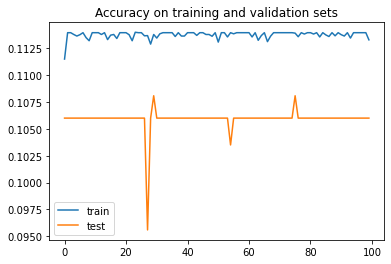

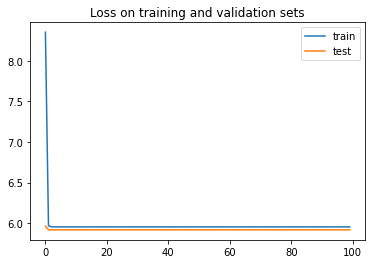

In [107]:
model_4.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01,rho=0.9),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

tic = time.time()

#Train model
history4 = model_4.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.2, verbose=1)

toc = time.time()
print("Training time: {}s".format(toc-tic))

plt.figure(19)
plt.plot(history4.history['accuracy'],label='train')
plt.plot(history4.history['val_accuracy'],label='test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()

plt.figure(20)
plt.plot(history4.history['loss'],label='train')
plt.plot(history4.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

# Part 2 FINE TUNNING of model with better results using Keras Tuner
In this section I decided to use keras tuner instead of making a custom grid partitioning because the hyperparameters are based on tensorflow.keras models and keras tuner is quite optimized to do this specific task

In [22]:
!pip install keras_tuner
!pip install tensorflow_addons
from tensorflow.keras.utils import plot_model
# tfa used for F-measure metric
import tensorflow_addons as tfa
import keras_tuner as kt

### Define A Hyper Parameter Model
##### Documentation Reference 
[https://blog.paperspace.com/hyperparameter-optimization-with-keras-tuner/](https://blog.paperspace.com/hyperparameter-optimization-with-keras-tuner/)
[https://www.tensorflow.org/tutorials/keras/keras_tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner)

In [20]:
def build_model(hp):
    model_hp = models.Sequential()
    
    # hyperparameters possible values as defined in assignment
    hp_a  = hp.Choice('a', values = [1e-1, 1e-2,1e-6])
    hp_n1_hidden = hp.Choice('n_hidden_1', values=[68,128])
    hp_n2_hidden = hp.Choice('n_hidden_2', values=[256,512])
    hp_lr = hp.Choice('learning_rate', values=[1e-1,1e-2,1e-3])
    
     # I can ommit input layer and just define input shape on the 1st hidden layer as shown before
     # 1st hidden layer
    model_hp.add(layers.Dense(units=hp_n1_hidden,input_shape=(n_features,), activation='relu',
                              kernel_regularizer= regularizers.L2(l2=hp_a),
                              kernel_initializer = initializers.HeNormal()))

     # add first droput layer that ommits data in order to make the training more robust
    model_hp.add(layers.Dropout(0.3))

     # 2nd hidden layer and its dropout
    model_hp.add(layers.Dense(units=hp_n2_hidden,activation='relu', 
                               kernel_regularizer= regularizers.L2(l2=hp_a),
                               kernel_initializer = initializers.HeNormal()))
    model_hp.add(layers.Dropout(0.3))

     #Ouput Softmax layer
    model_hp.add(layers.Dense(10,activation='softmax',kernel_initializer = initializers.HeNormal()))
     

    model_hp.summary()
     # compile model
     
    model_hp.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate= hp_lr),
                      loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                      metrics=['accuracy',tfa.metrics.F1Score(n_classes,'macro')])
    return model_hp

### Find hyperparameteres using kt.Hyperband tuner

In [43]:
# Initialize Hyberband tunner
# direction is max because we need to stop when f1 score stops increasing
tuner = kt.Hyperband(build_model,objective=kt.Objective('val_f1_score',direction='max'), 
                     max_epochs = 1000,factor=3)



INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 68)                53380     
                                                                 
 dropout_2 (Dropout)         (None, 68)                0         
                                                                 
 dense_4 (Dense)             (None, 256)               17664     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 73,614
Trainable params: 73,614
Non-trainable params: 0
______________________________

In [44]:
# Early Stopping of the tunner patience = 200 
# mode = max because we measure f1 score and we want to stop the process when it will stop increasing
early_stop_signal = tf.keras.callbacks.EarlyStopping(monitor='val_f1_score',
                                                     mode='max',
                                                     patience=200,
                                                     verbose=1)

In [56]:
# Run hyperband tuner
tuner.search(x_train,y_train,epochs=1000,validation_split=0.2,callbacks=[early_stop_signal])
#Get the optimal hyperparameters
optimal_hps = tuner.get_best_hyperparameters(num_trials=3)[0]

print("Optimal number of neurons for the 1st hidden layer is: {}neurons".format(optimal_hps.get('n_hidden_1')))
print("Optimal number of neurons for the 2nd hidden layer is: {}neurons".format(optimal_hps.get('n_hidden_2')))
print("Optimal learning rate for the optimizer RMSProp is : {}".format(optimal_hps.get('learning_rate')))
print('Optimal a parameter for weight reguralization using L2 norm(distance) is {}'.format(optimal_hps.get('a')))

INFO:tensorflow:Oracle triggered exit
Optimal number of neurons for the 1st hidden layer is: 128neurons
Optimal number of neurons for the 2nd hidden layer is: 256neurons
Optimal learning rate for the optimizer RMSProp is : 0.01
Optimal a parameter for weight reguralization using L2 norm(distance) is 1e-06


Trial 31 Complete [00h 00m 22s]
val_f1_score: 0.019168173894286156

Best val_f1_score So Far: 0.9251760244369507
Total elapsed time: 00h 08m 21s
Optimal number of neurons for the 1st hidden layer is: 128neurons
Optimal number of neurons for the 2nd hidden layer is: 512neurons
Optimal learning rate for the optimizer RMSProp is : 0.01
Optimal a parameter for weight reguralization using L2 norm(distance) is 1e-06


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               33024     
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
188/188 [==========================

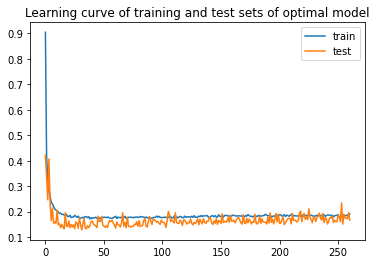

In [59]:
# Optimal Model training
model = tuner.hypermodel.build(optimal_hps)

history_optim = model.fit(x_train,y_train,epochs = 1000, batch_size=256, validation_split=0.2,callbacks = [early_stop_signal])

plt.figure("Optim Loss Figure")
plt.plot(history_optim.history['loss'], label='train')
plt.plot(history_optim.history['val_loss'],label='test')
plt.legend()
plt.title("Learning curve of training and test sets of optimal model")
plt.show()

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.95      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



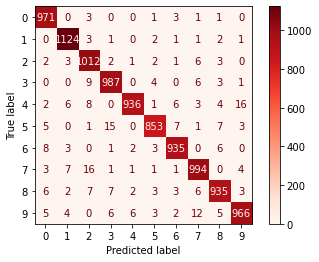

In [73]:

from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
number_labels =['0','1','2','3','4','5','6','7','8','9']
# Predictions
y_pred = model.predict(x_test,verbose=1)
# Get the value of label predicted
y_pred_one_hot = np.argmax(y_pred,axis=1)
# Create confusion matrix
CM = confusion_matrix(y_test_not_processed,y_pred_one_hot)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=number_labels)
disp.plot(cmap=plt.cm.Reds)

#scores 
print(classification_report(y_test_not_processed,y_pred_one_hot))

### model Test

1/1 [==============================] - 0s 21ms/step


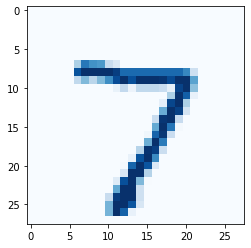

Model prediction: 7


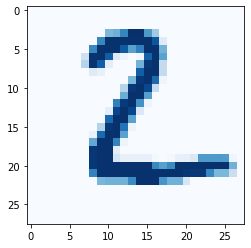

Model prediction: 2


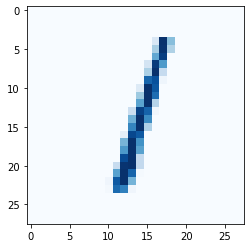

Model prediction: 1


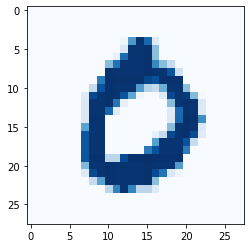

Model prediction: 0


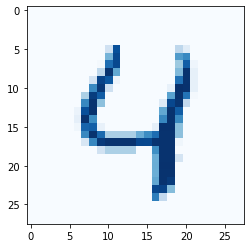

Model prediction: 4


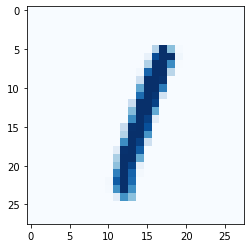

Model prediction: 1


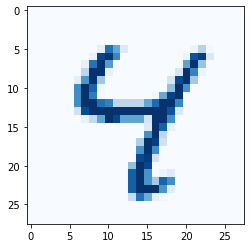

Model prediction: 4


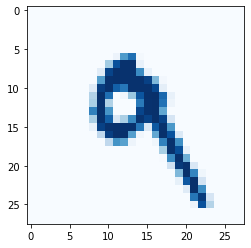

Model prediction: 9


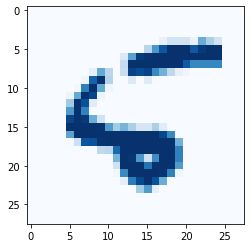

Model prediction: 6


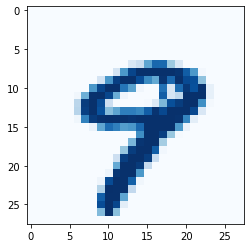

Model prediction: 9


In [86]:
n = 10
test_img = x_test[:n]
pred = model.predict(test_img)

for i in range(n):
    plt.imshow(np.reshape(test_img[i],[28,28]), cmap = 'Blues') #turn grayscale to bluescale
    plt.show()
    # model predictio is the index of the bool = 1 
    print("Model prediction: %i" % np.argmax(pred[i]))
   

In [51]:
# Use RandomSearch Tuner also for testing purposes
# Initialize a random search tuner
# using the Resnet architecture
# and the Random Search algorithm
tuner = kt.tuners.RandomSearch(
  build_model,
  objective=kt.Objective('val_f1_score',direction='max'),
  max_trials=1000
  )

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 68)                53380     
                                                                 
 dropout_4 (Dropout)         (None, 68)                0         
                                                                 
 dense_7 (Dense)             (None, 256)               17664     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 73,614
Trainable params: 73,614
Non-trainable params: 0
______________________________

In [53]:
# Test Random Search Tuner for Experimentation
tuner.search_space_summary()
tuner.search(x_train,y_train,epochs=1000,validation_split=0.2,callbacks=early_stop_signal)
optimal_hps = tuner.get_best_hyperparameters()
tuner.results_summary()

Search space summary
Default search space size: 4
a (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 1e-06], 'ordered': True}
n_hidden_1 (Choice)
{'default': 68, 'conditions': [], 'values': [68, 128], 'ordered': True}
n_hidden_2 (Choice)
{'default': 256, 'conditions': [], 'values': [256, 512], 'ordered': True}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001], 'ordered': True}
INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
a: 1e-06
n_hidden_1: 128
n_hidden_2: 256
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 6
tuner/round: 0
Score: 0.9355886578559875
Trial summary
Hyperparameters:
a: 1e-06
n_hidden_1: 128
n_hidden_2: 512
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 6
tuner/round: 0
Score: 0.9313648343086243
Trial summary
Hyperparameters:
a: 1e-06
n_hidden_1: 68
n_hidden_2: 256
learning_r